In [5]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [7]:
#!pip install seaborn

In [11]:
import seaborn as sns

In [8]:
labels = 'OCTDL_dataset/labels.csv'
df = pd.read_csv(labels)

In [9]:
df.head()

,file_name,disease,subcategory,condition,patient_id,eye,sex,year,image_width,image_hight
0,amd_1047099_1,AMD,intermediate,MNV_suspected,1047099,0,0,0,1101,410
1,amd_1047099_2,AMD,intermediate,MNV_suspected,1047099,0,0,0,731,265
2,amd_1047099_3,AMD,intermediate,MNV_suspected,1047099,0,0,0,1100,410
3,amd_1047099_4,AMD,intermediate,MNV_suspected,1047099,0,0,0,882,321
4,amd_1084498_1,AMD,late,MNV,1084498,0,0,0,882,321


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_name    2064 non-null   object
 1   disease      2064 non-null   object
 2   subcategory  2064 non-null   object
 3   condition    2064 non-null   object
 4   patient_id   2064 non-null   int64 
 5   eye          2064 non-null   object
 6   sex          2064 non-null   object
 7   year         2064 non-null   int64 
 8   image_width  2064 non-null   int64 
 9   image_hight  2064 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 161.4+ KB


In [15]:
e = (df['eye'] != '0')
s = (df['sex'] != '0')
y = (df['year'] != '0')
e & s & y

0       False
1       False
2       False
3       False
4       False
        ...  
2059     True
2060    False
2061    False
2062    False
2063    False
Length: 2064, dtype: bool

In [16]:
ptdata = df[e & s & y]
ptdata.head()

,file_name,disease,subcategory,condition,patient_id,eye,sex,year,image_width,image_hight
12,amd_1101816_1,AMD,late,MNV,1101816,OD,F,1941,882,322
13,amd_1101816_2,AMD,late,MNV,1101816,OD,F,1941,882,322
14,amd_1101816_3,AMD,late,MNV,1101816,OS,F,1941,882,322
15,amd_1101816_4,AMD,late,MNV,1101816,OS,F,1941,882,322
27,amd_1191668_1,AMD,intermediate,MNV_suspected,1191668,OD,F,1948,882,322


In [17]:
ptdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448 entries, 12 to 2059
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_name    448 non-null    object
 1   disease      448 non-null    object
 2   subcategory  448 non-null    object
 3   condition    448 non-null    object
 4   patient_id   448 non-null    int64 
 5   eye          448 non-null    object
 6   sex          448 non-null    object
 7   year         448 non-null    int64 
 8   image_width  448 non-null    int64 
 9   image_hight  448 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 38.5+ KB


In [18]:
ptdata['age'] = 2024 - ptdata['year']
ptdata.head()


/tmp/ipykernel_210454/2519043527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptdata['age'] = 2024 - ptdata['year']


,file_name,disease,subcategory,condition,patient_id,eye,sex,year,image_width,image_hight,age
12,amd_1101816_1,AMD,late,MNV,1101816,OD,F,1941,882,322,83
13,amd_1101816_2,AMD,late,MNV,1101816,OD,F,1941,882,322,83
14,amd_1101816_3,AMD,late,MNV,1101816,OS,F,1941,882,322,83
15,amd_1101816_4,AMD,late,MNV,1101816,OS,F,1941,882,322,83
27,amd_1191668_1,AMD,intermediate,MNV_suspected,1191668,OD,F,1948,882,322,76


In [52]:
ptdemo = ptdata[['patient_id','age','sex','disease','subcategory','condition']]
ptdemo

,patient_id,age,sex,disease,subcategory,condition
12,1101816,83,F,AMD,late,MNV
13,1101816,83,F,AMD,late,MNV
14,1101816,83,F,AMD,late,MNV
15,1101816,83,F,AMD,late,MNV
27,1191668,76,F,AMD,intermediate,MNV_suspected
...,...,...,...,...,...,...
2049,8710888,63,F,VID,LH,MH
2050,8710888,63,F,VID,LH,MH
2051,8710888,63,F,VID,LH,MH
2058,9300009,65,F,VID,LH,MH


In [53]:
ptdf = ptdemo.drop_duplicates()
ptdf

,patient_id,age,sex,disease,subcategory,condition
12,1101816,83,F,AMD,late,MNV
27,1191668,76,F,AMD,intermediate,MNV_suspected
30,1210637,85,F,AMD,early,drusen
36,1219632,87,F,AMD,late,MNV
38,1249764,68,F,AMD,late,MNV
...,...,...,...,...,...,...
2018,5848517,62,M,VID,LH,MH
2019,5848517,62,F,VID,LH,MH
2039,8060885,68,F,VID,MH,MH
2046,8710888,63,F,VID,LH,MH


In [59]:
avg_age = ptdf.groupby('disease').agg({'age':'mean'})
avg_age

,age
disease,
AMD,73.233333
DME,82.000000
ERM,63.416667
NO,53.812500
RVO,57.750000
VID,66.750000


<BarContainer object of 6 artists>

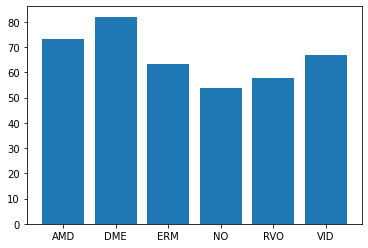

In [64]:
plt.bar(avg_age.index,avg_age['age'])

In [58]:
ptdf.groupby(['disease','sex']).agg({'patient_id':'count'})

patient_id
disease sex            
AMD     F           106
        M            44
DME     F             1
ERM     F             8
        M             4
NO      F            12
        M             4
RVO     F             2
        M             2
VID     F             5
        M             3

In [35]:
import seaborn as sns

sns.lineplot(data=ptdf,hue='disease',x='age',y='')

,,disease
subcategory,disease,
KME,RVO,8
LH,VID,12
MH,VID,5
VMT,VID,1
early,AMD,74
emmetropia,NO,26
intermediate,AMD,73
late,AMD,201
myopia,NO,22


In [36]:
ptdata.groupby(['disease','subcategory']).agg({'disease':'count'})

disease
disease subcategory          
AMD     early              74
        intermediate       73
        late              201
DME     none                4
ERM     none               22
NO      emmetropia         26
        myopia             22
RVO     KME                 8
VID     LH                 12
        MH                  5
        VMT                 1

In [37]:
ptdata.groupby(['disease','subcategory','eye']).agg({'disease':'count'})

disease
disease subcategory  eye         
AMD     early        OD        32
                     OS        42
        intermediate OD        30
                     OS        43
        late         OD        95
                     OS       106
DME     none         OD         4
ERM     none         OD         9
                     OS        13
NO      emmetropia   OD        16
                     OS        10
        myopia       OD        10
                     OS        12
RVO     KME          OD         3
                     OS         5
VID     LH           OS        12
        MH           OD         4
                     OS         1
        VMT          OS         1

In [12]:
sns.set_style("whitegrid")

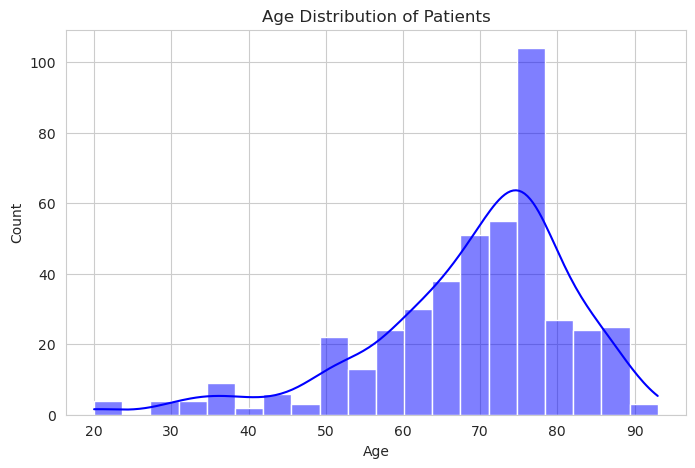

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(ptdata["age"], bins=20, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Patients")
plt.show()

/tmp/ipykernel_210454/3943363792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["disease"], order=df["disease"].value_counts().index, palette="viridis")


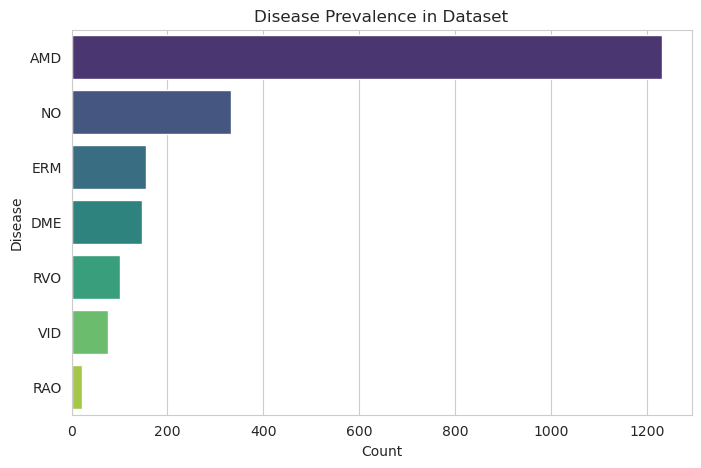

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df["disease"], order=df["disease"].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.title("Disease Prevalence in Dataset")
plt.show()

/tmp/ipykernel_210454/4086625701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["eye"], palette="coolwarm")


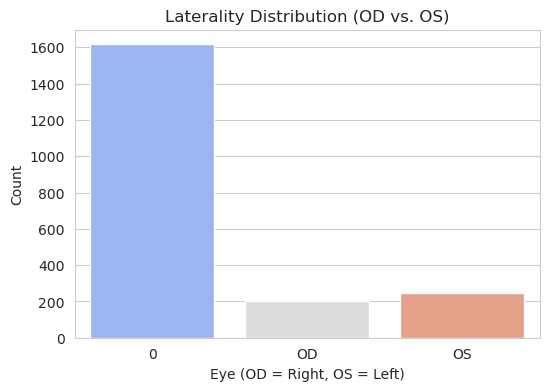

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["eye"], palette="coolwarm")
plt.xlabel("Eye (OD = Right, OS = Left)")
plt.ylabel("Count")
plt.title("Laterality Distribution (OD vs. OS)")
plt.show()

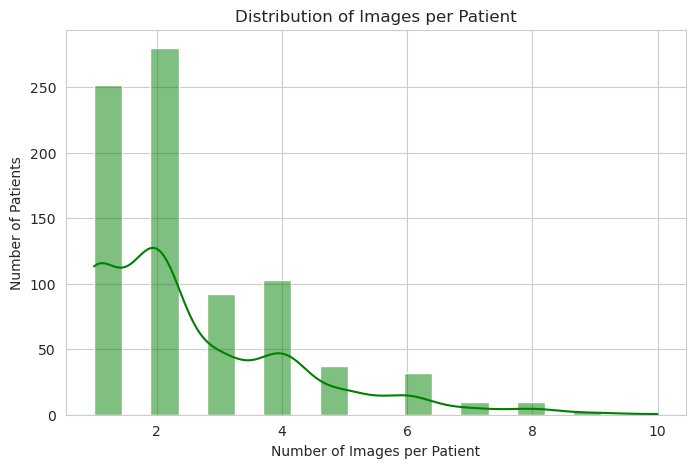

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df["patient_id"].value_counts(), bins=20, kde=True, color="green")
plt.xlabel("Number of Images per Patient")
plt.ylabel("Number of Patients")
plt.title("Distribution of Images per Patient")
plt.show()